In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For scikit-learn, you usually import specific components:
from sklearn.linear_model import LinearRegression
# etc.

# Load the dataset
bc_data = pd.read_csv('D:\CS Classes at GT\CS 7641 - ML\ASSIGNMENT - 3\Breast Cancer Wisconsin.csv')
print(bc_data.head())
print(bc_data.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

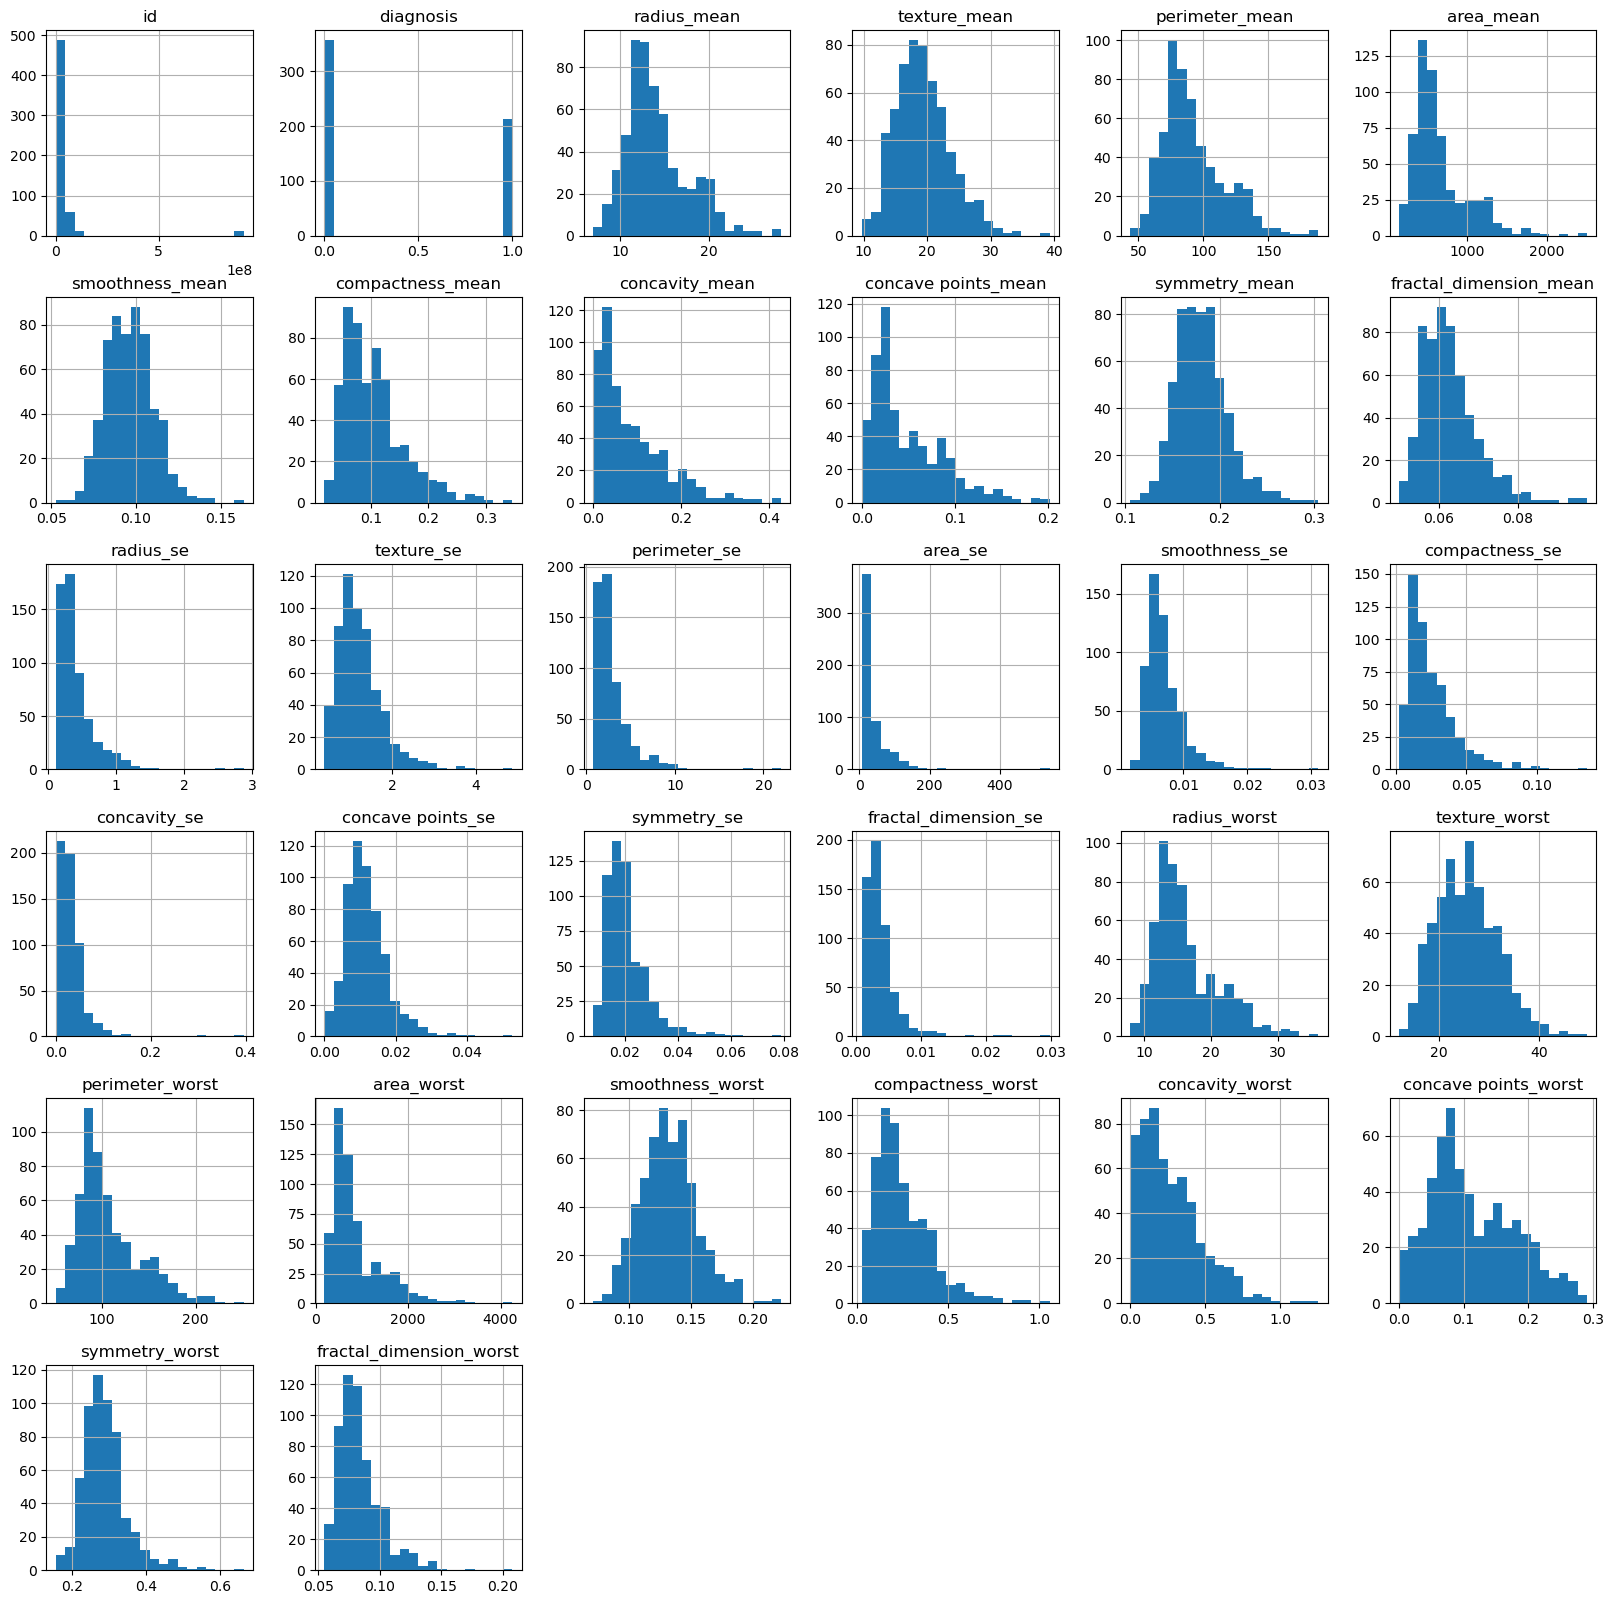

In [29]:
bc_data.drop('Unnamed: 32', axis=1, inplace=True)
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})
bc_data.hist(figsize=(20, 20), bins=20)
plt.show()


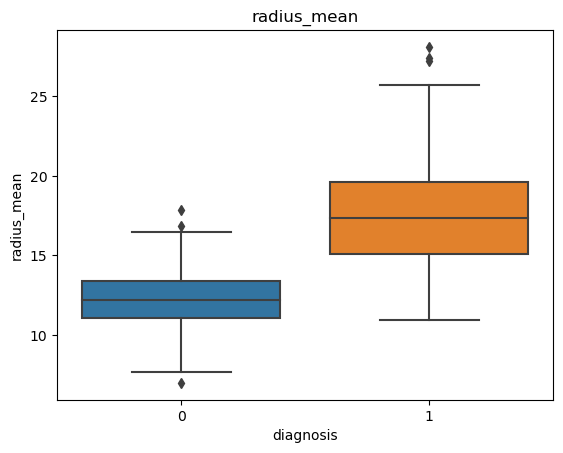

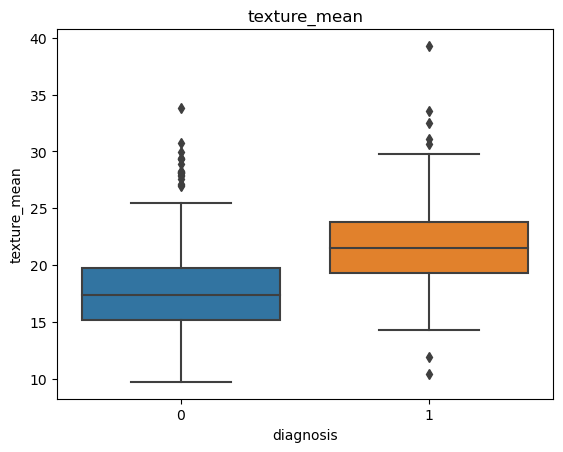

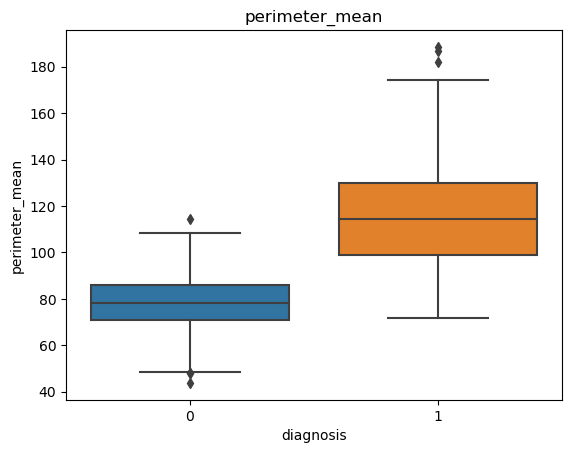

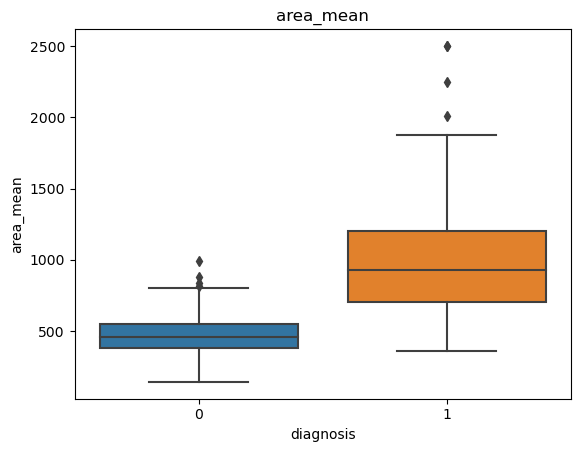

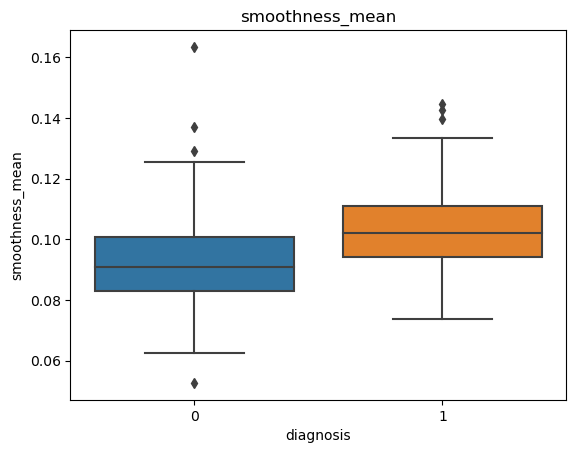

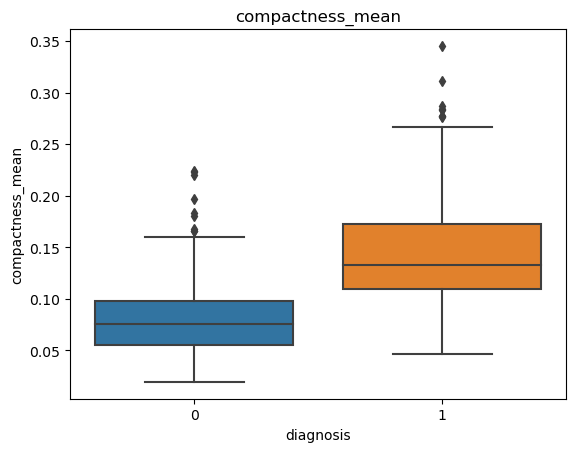

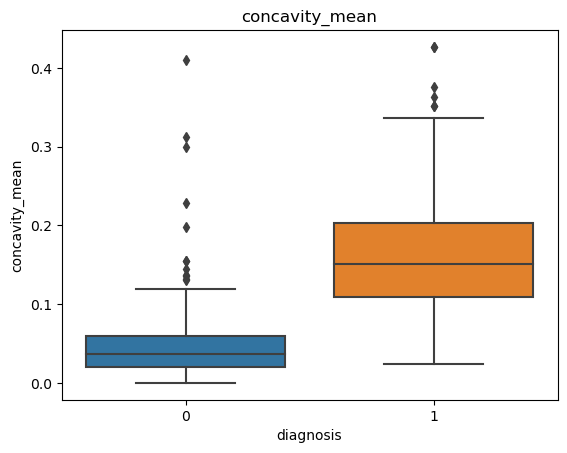

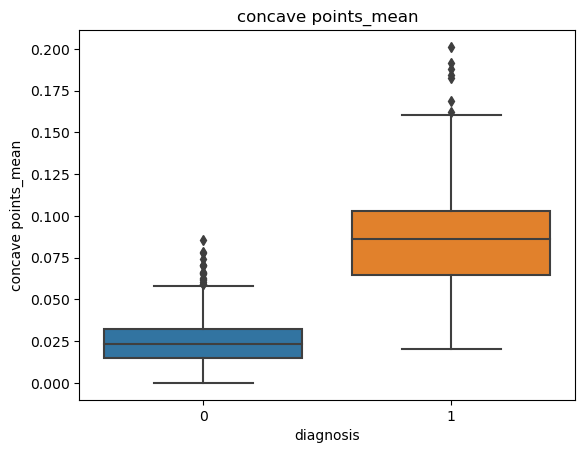

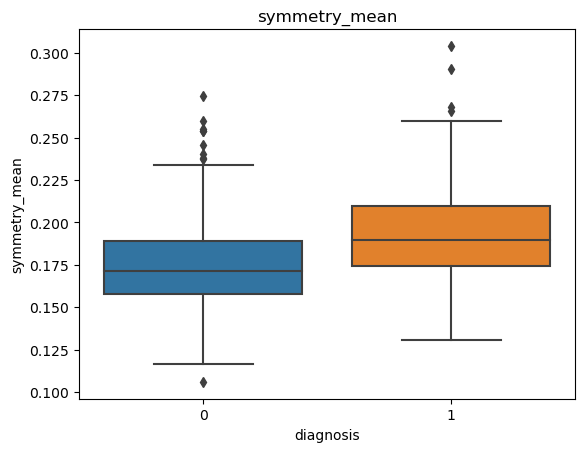

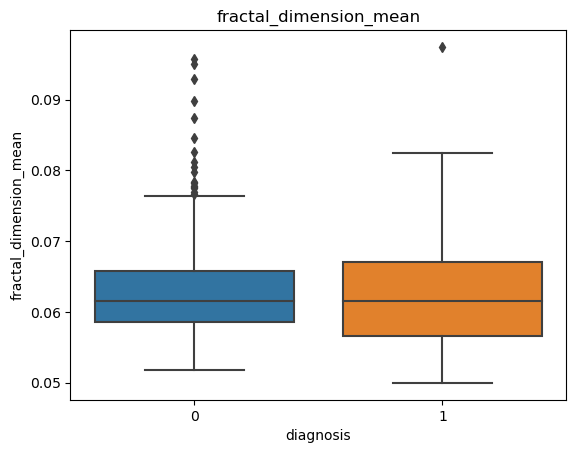

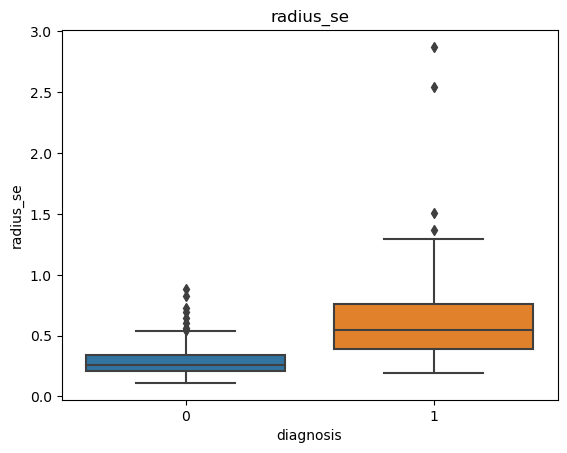

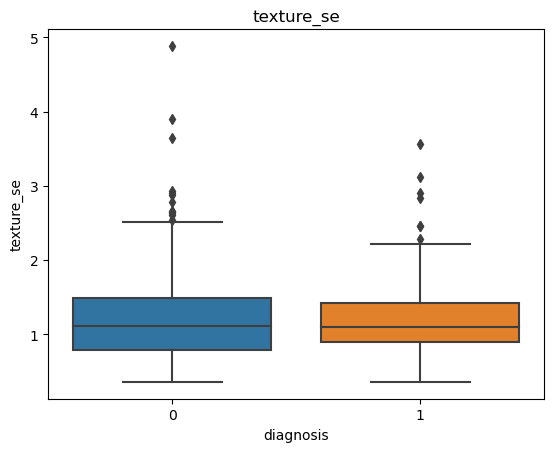

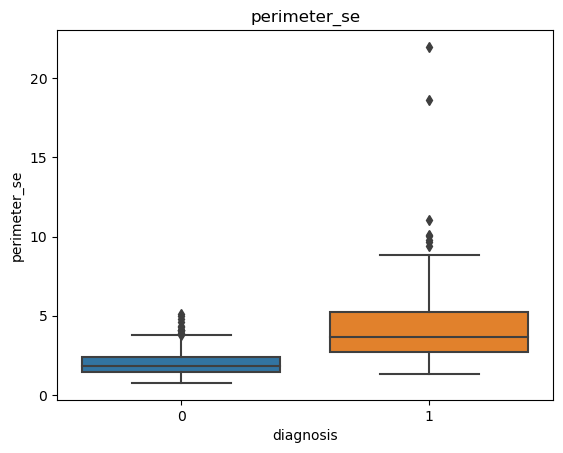

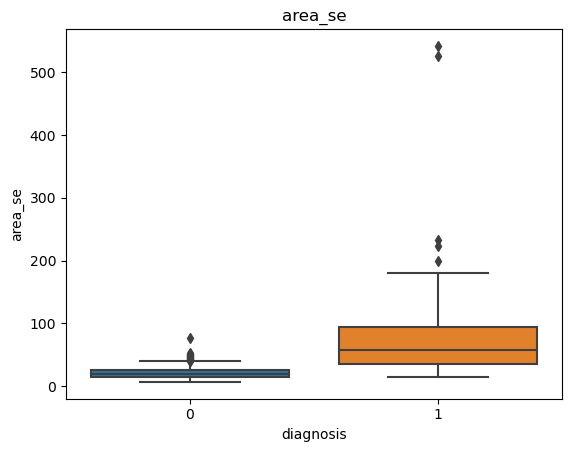

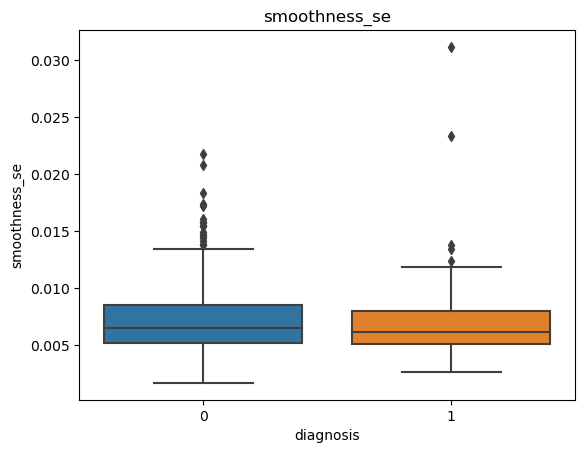

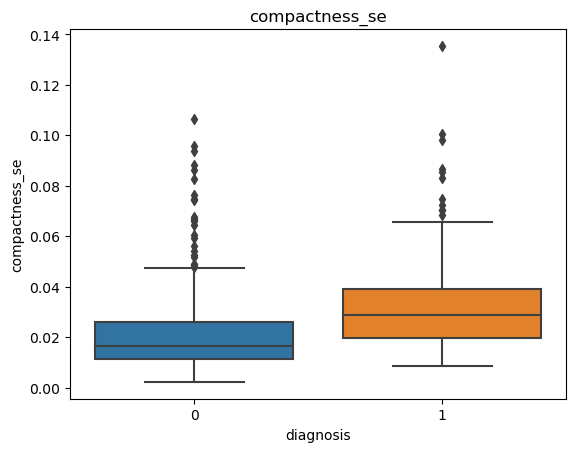

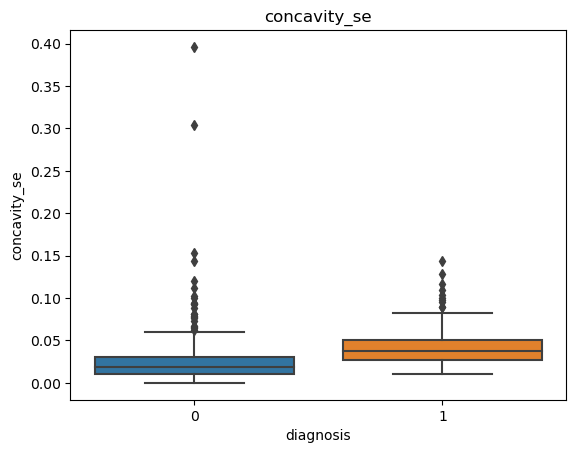

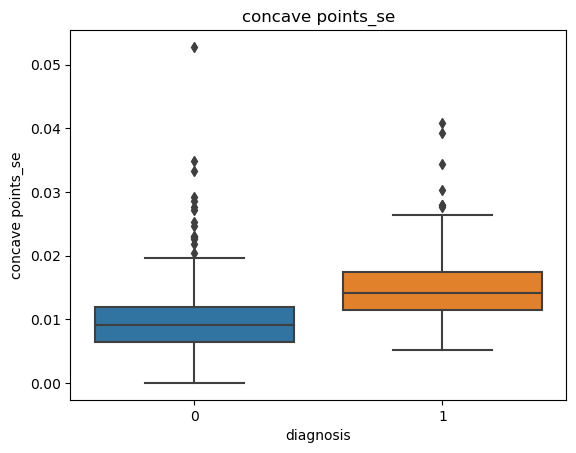

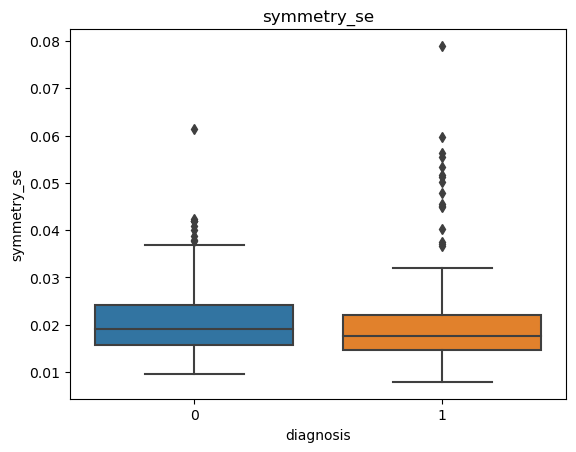

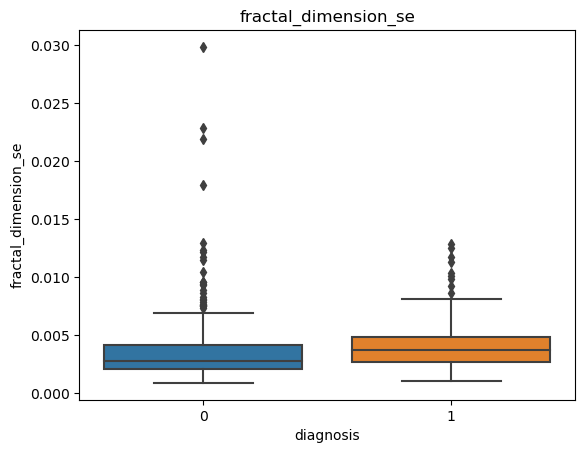

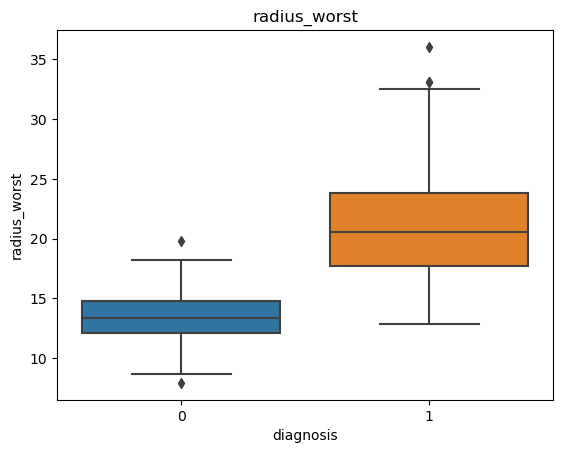

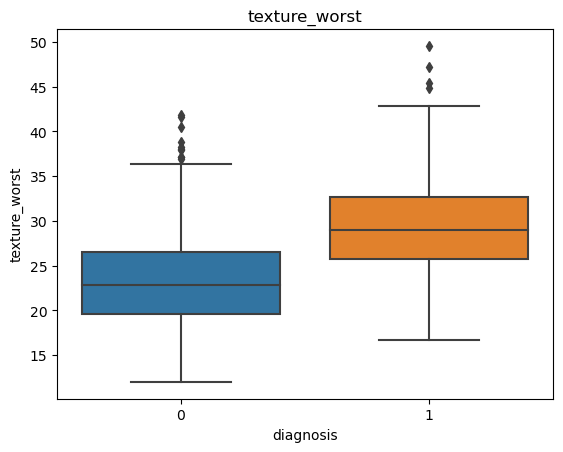

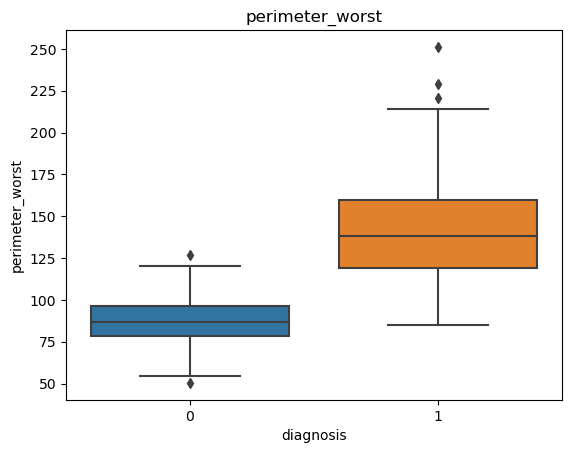

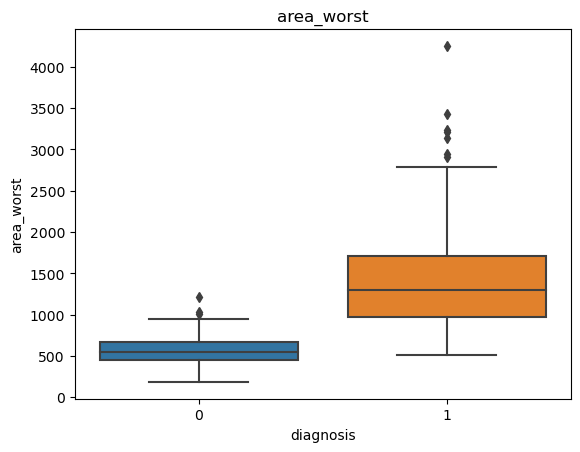

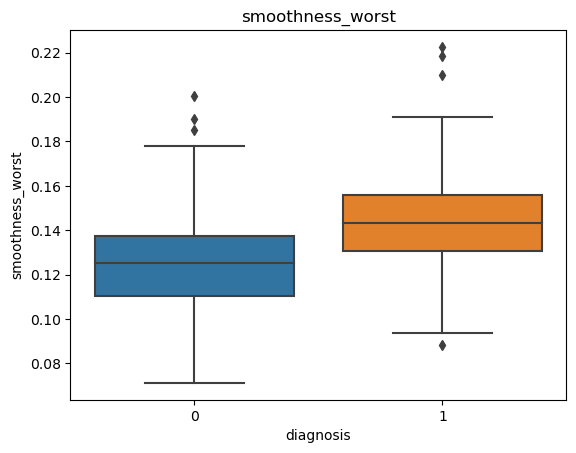

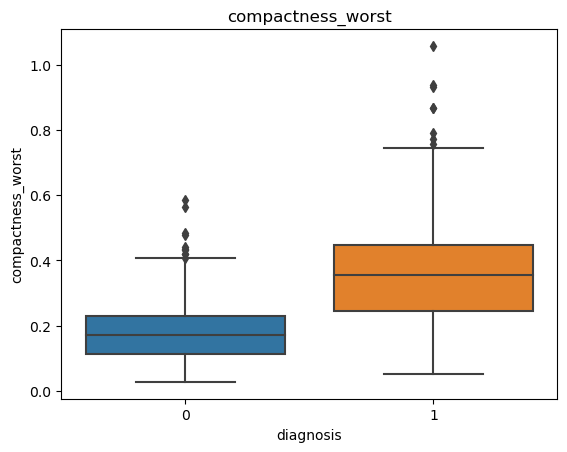

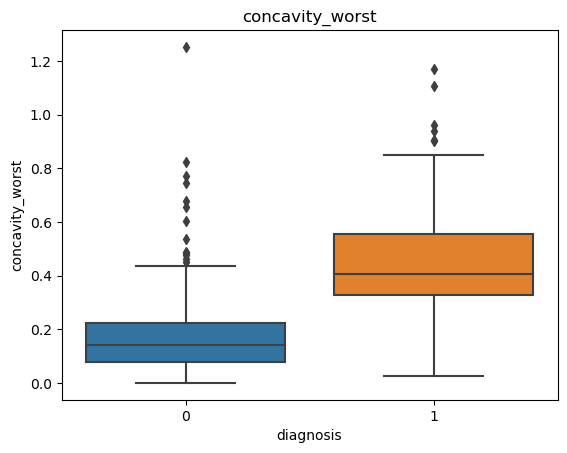

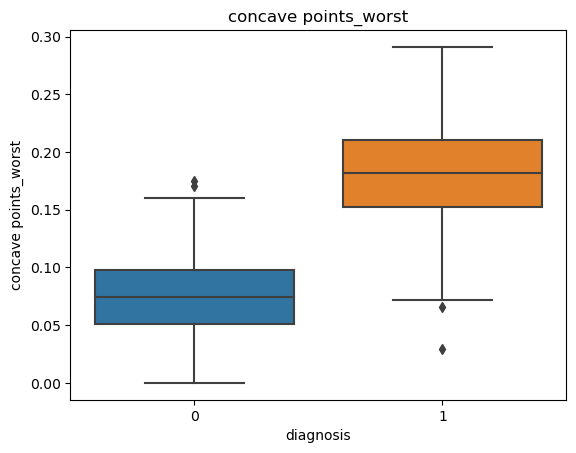

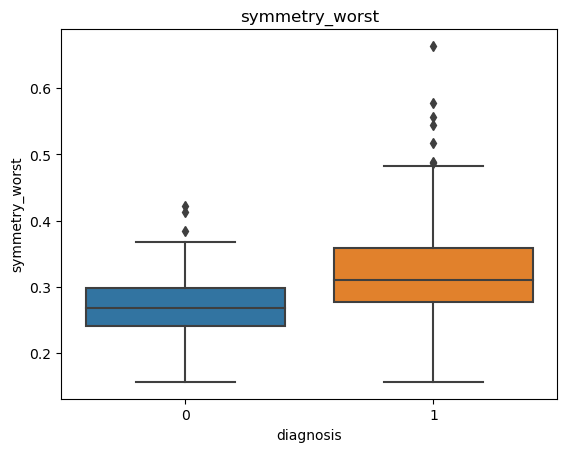

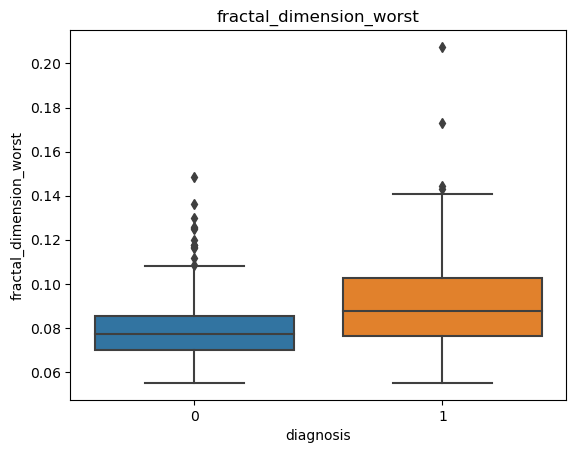

In [30]:
for column in bc_data.drop(['id', 'diagnosis'], axis=1).columns:
    sns.boxplot(x='diagnosis', y=column, data=bc_data)
    plt.title(column)
    plt.show()

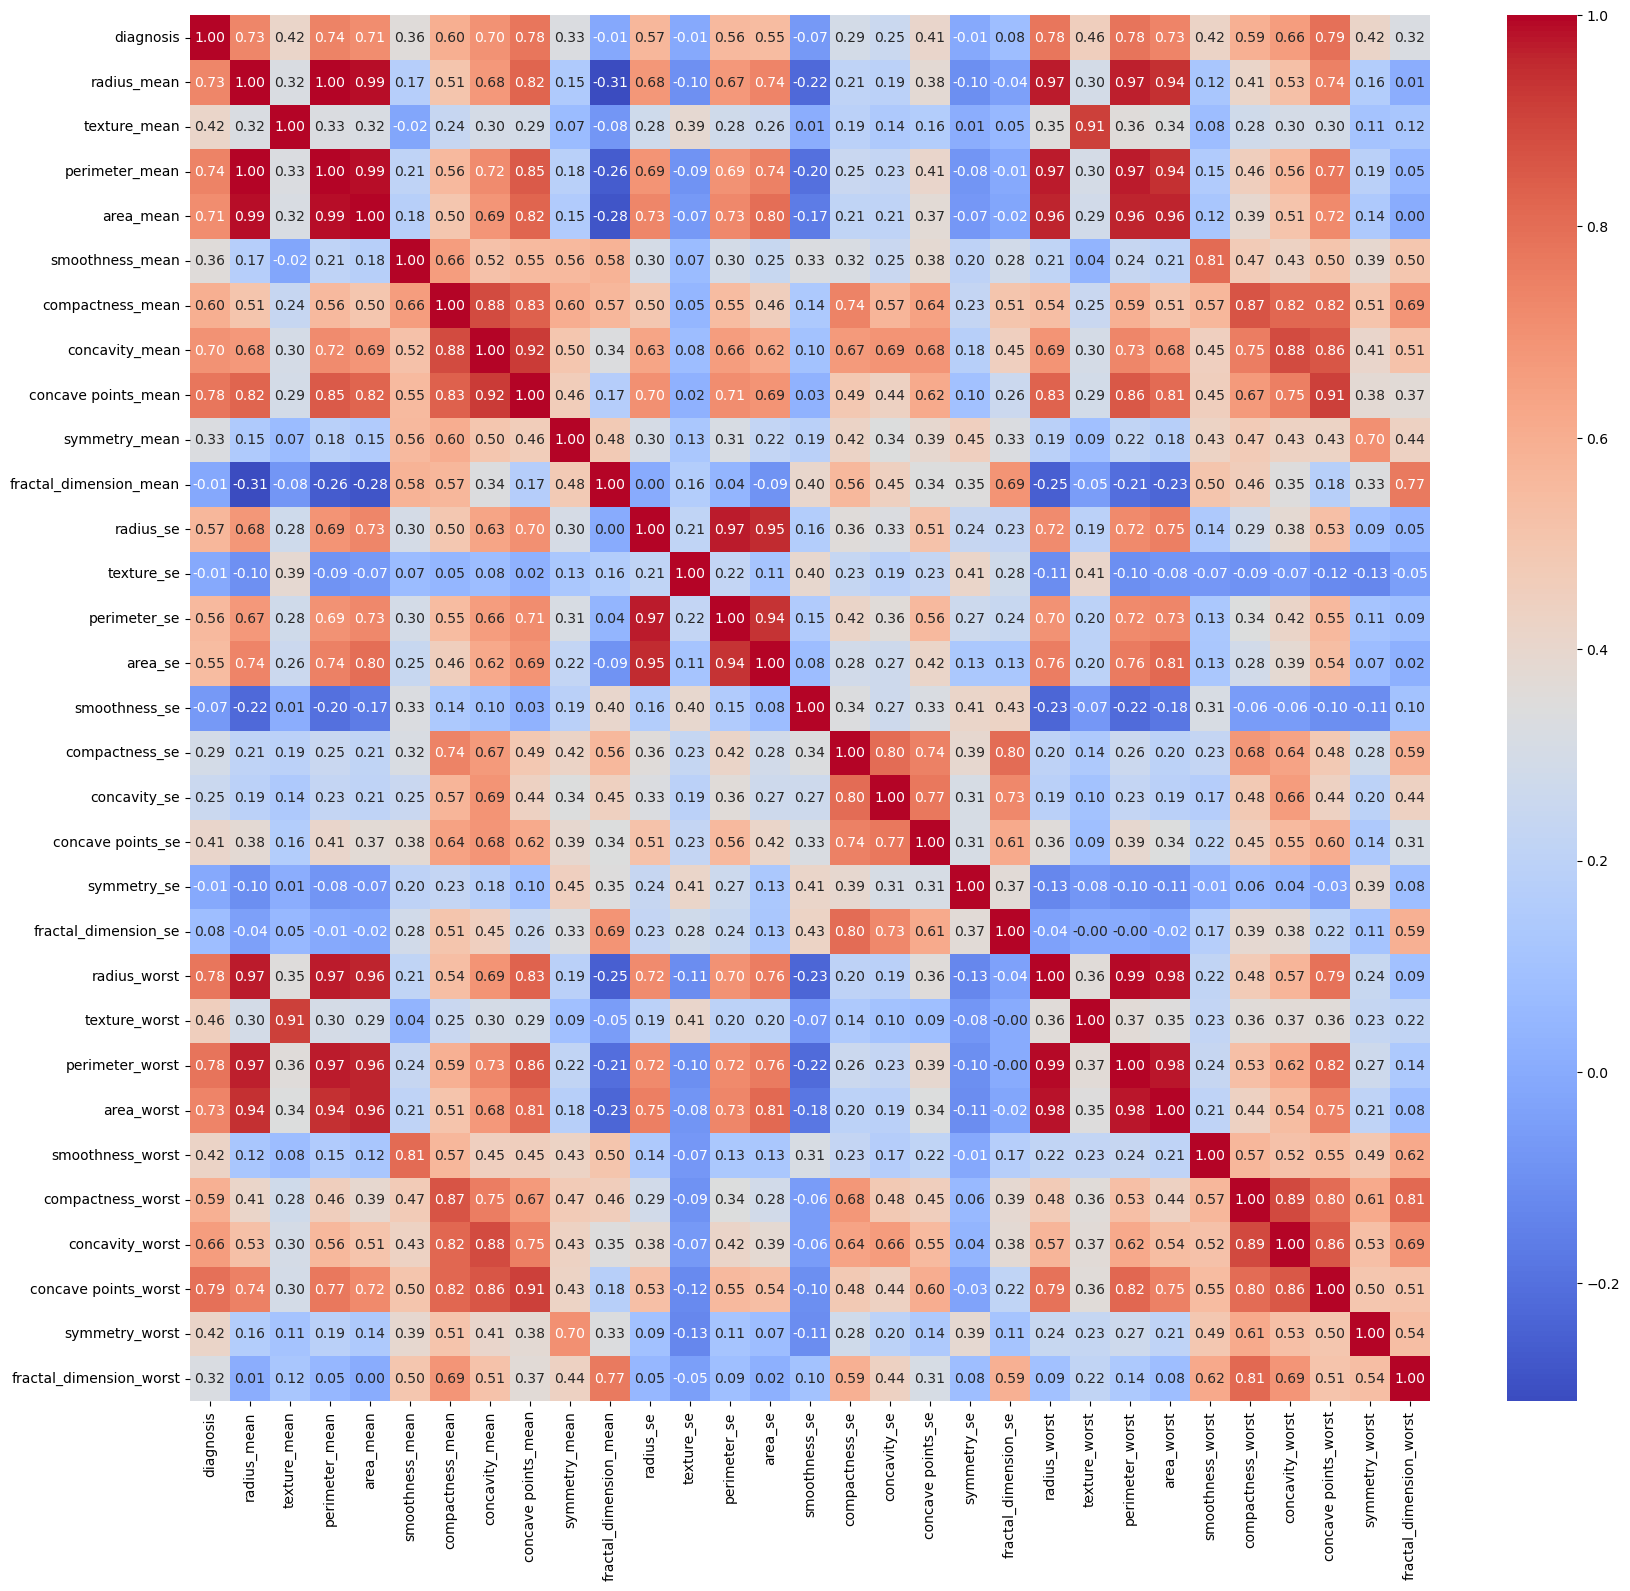

In [31]:

plt.figure(figsize=(20, 18))
sns.heatmap(bc_data.drop('id', axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


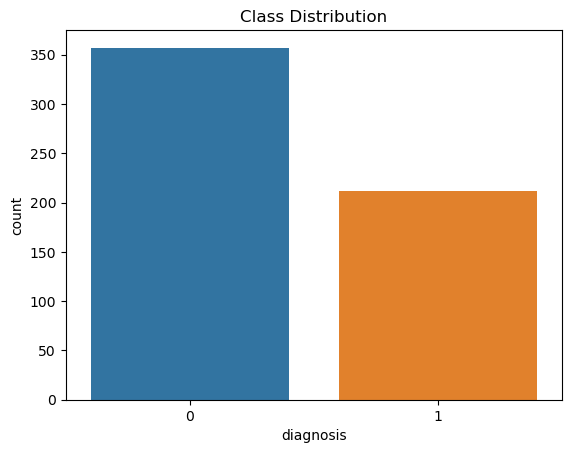

In [32]:
sns.countplot(x='diagnosis', data=bc_data)
plt.title('Class Distribution')
plt.show()


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
bc_data = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast Cancer Wisconsin.csv')
bc_data.drop('Unnamed: 32', axis=1, inplace=True)
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data.drop('diagnosis', axis=1))

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataset
bc_data['cluster_label'] = clusters

# View the new dataset with cluster labels
print(bc_data.head())

# Save the new dataset to a CSV file if needed
bc_data.to_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\breast_cancer_with_clusters.csv', index=False)

# Splitting the dataset into training and testing sets
X = bc_data.drop(['diagnosis', 'cluster_label'], axis=1)  # Drop target variable and cluster label for training
y = bc_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_with_cluster = bc_data.drop('diagnosis', axis=1)  # Keep cluster labels
y_train_with_cluster = y_train

# Feature names including cluster
feature_names_with_cluster = list(bc_data.columns)
print("Features including cluster label:", feature_names_with_cluster)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoo

Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001}


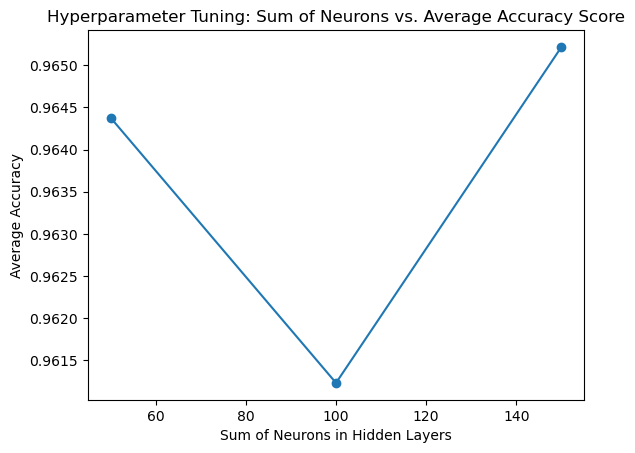

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Load the new dataset with clusters
bc_data_with_clusters = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\breast_cancer_with_clusters.csv')

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data_with_clusters.drop('diagnosis', axis=1))

# Splitting the dataset into training and testing sets
y = bc_data_with_clusters['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define a range of hyperparameters for the grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Initialize the MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Plotting the hyperparameter tuning results
# We'll use the sum of the sizes for simplicity (e.g., (50, 50) will be represented as 100)
size_representation = [sum(size) if isinstance(size, tuple) else size for size in param_grid['hidden_layer_sizes']]

# Create a mapping from size representation to mean scores
size_to_score = {sum(size): [] for size in param_grid['hidden_layer_sizes']}

# Populate the dictionary with mean test scores
for i, params in enumerate(grid_search.cv_results_['params']):
    size_sum = sum(params['hidden_layer_sizes']) if isinstance(params['hidden_layer_sizes'], tuple) else params['hidden_layer_sizes']
    size_to_score[size_sum].append(grid_search.cv_results_['mean_test_score'][i])

# Calculate the average score for each size sum
for size_sum in size_to_score:
    size_to_score[size_sum] = np.mean(size_to_score[size_sum])

# Sort the size representations for plotting
sorted_size_representation = sorted(size_to_score.keys())
sorted_scores = [size_to_score[size] for size in sorted_size_representation]

# Plotting the results
plt.plot(sorted_size_representation, sorted_scores, 'o-')
plt.xlabel('Sum of Neurons in Hidden Layers')
plt.ylabel('Average Accuracy')
plt.title('Hyperparameter Tuning: Sum of Neurons vs. Average Accuracy Score')
plt.show()


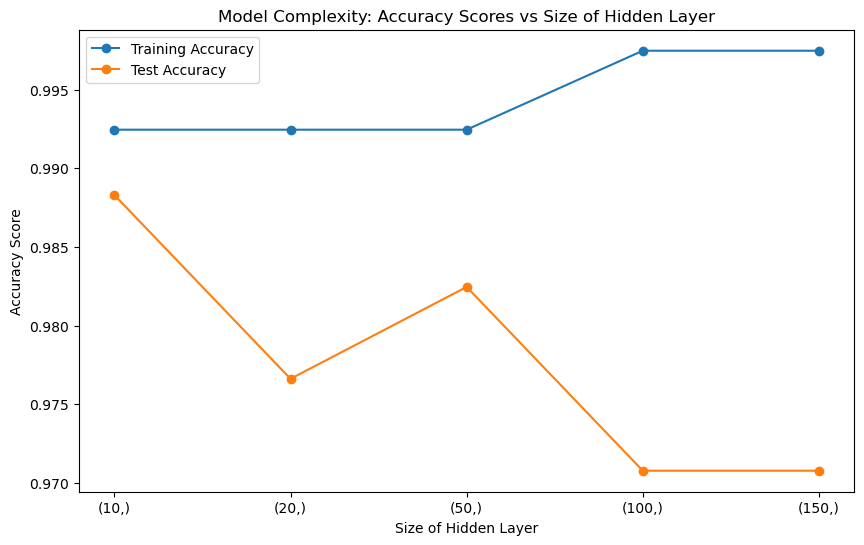

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed
# Also assuming that y_train and y_test are correctly formatted for sklearn (no need to call ravel())

# Test different sizes of the hidden layer
hidden_layer_sizes = [(10,), (20,), (50,), (100,), (150,)]
train_scores = []
test_scores = []

for size in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=size, max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    
    train_preds = mlp.predict(X_train)
    test_preds = mlp.predict(X_test)
    
    train_scores.append(accuracy_score(y_train, train_preds))
    test_scores.append(accuracy_score(y_test, test_preds))

# Plotting the model complexity graph
plt.figure(figsize=(10, 6))
plt.plot([str(size) for size in hidden_layer_sizes], train_scores, 'o-', label='Training Accuracy')
plt.plot([str(size) for size in hidden_layer_sizes], test_scores, 'o-', label='Test Accuracy')
plt.xlabel('Size of Hidden Layer')
plt.ylabel('Accuracy Score')
plt.title('Model Complexity: Accuracy Scores vs Size of Hidden Layer')
plt.legend()
plt.show()


Iteration 100, Training Score: 0.9912023460410557, Validation Score: 0.9824561403508771
Iteration 200, Training Score: 0.9970674486803519, Validation Score: 0.9824561403508771
Iteration 300, Training Score: 1.0, Validation Score: 0.9824561403508771


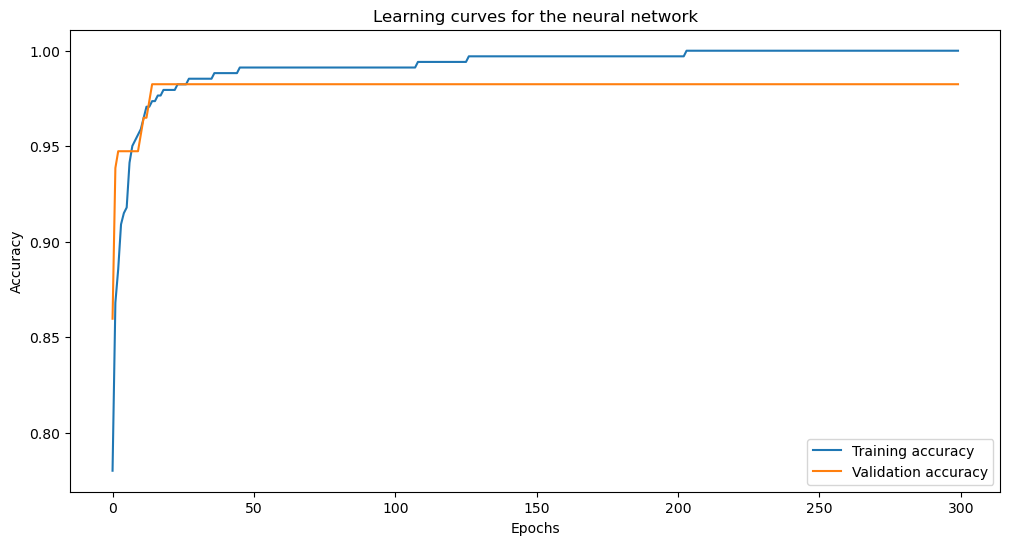

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

bc_data_with_clusters = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\breast_cancer_with_clusters.csv')

X = bc_data_with_clusters.drop('diagnosis', axis=1)
y = bc_data_with_clusters['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the optimal hyperparameters
optimal_hyperparams = {
    'hidden_layer_sizes': (100, 50),
    'activation': 'tanh',
    'learning_rate_init': 0.001
}

# Initialize the MLPClassifier with the optimal hyperparameters
mlp = MLPClassifier(max_iter=300, random_state=42, **optimal_hyperparams)

# List to store the scores
train_scores, val_scores = [], []

# Fit the model and collect the scores for each iteration
for i in range(1, 301):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y))
    train_scores.append(mlp.score(X_train, y_train))
    val_scores.append(mlp.score(X_val, y_val))
    
    # Print out the scores every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Training Score: {train_scores[-1]}, Validation Score: {val_scores[-1]}")

# Plotting the learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_scores, label='Training accuracy')
plt.plot(val_scores, label='Validation accuracy')
plt.title('Learning curves for the neural network')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [37]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load your dataset here
bc_data_with_clusters = pd.read_csv('D:\CS Classes at GT\CS 7641 - ML\ASSIGNMENT - 3\\breast_cancer_with_clusters.csv')
X = bc_data.drop('diagnosis', axis=1)
y = bc_data['diagnosis'].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists for collecting data
training_sizes_line = []
training_times_line = []
testing_times_line = []

# Variables for collecting metrics at full training size
training_time_bar = None
testing_time_bar = None
accuracy_bar = None
precision_bar = None
recall_bar = None
f1_score_bar = None

# Define the best parameters from GridSearchCV or other hyperparameter tuning
best_params = {
    'hidden_layer_sizes': (100, 50),
    'activation': 'tanh',
    'solver': 'adam',
    'learning_rate_init': 0.001
}

# Loop over training sizes from 10% to 90% in increments of 10%
for size in np.linspace(0.1, 0.9, 9):
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(
        X_scaled, y, train_size=size, random_state=42
    )
    mlp = MLPClassifier(**best_params, random_state=42, max_iter=1000)
    
    # Training time
    start_time = time.perf_counter()
    mlp.fit(X_train_part, y_train_part)
    training_time = time.perf_counter() - start_time
    
    # Testing time (average over several runs for precision)
    start_time = time.perf_counter()
    for _ in range(10):  # Adjust as needed for precision
        y_pred = mlp.predict(X_test_part)
    testing_time = (time.perf_counter() - start_time) / 10
    
    training_sizes_line.append(size * 100)
    training_times_line.append(training_time)
    testing_times_line.append(testing_time)

# Full training size
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, train_size=None, random_state=42
)
mlp_full = MLPClassifier(**best_params, random_state=42, max_iter=1000)

# Training time
start_time = time.perf_counter()
mlp_full.fit(X_train, y_train)
training_time_bar = time.perf_counter() - start_time

# Testing time (average over several runs for precision)
start_time = time.perf_counter()
for _ in range(100):  # Adjust as needed for precision
    y_pred_full = mlp_full.predict(X_test)
testing_time_bar = (time.perf_counter() - start_time) / 100

# Calculate metrics
accuracy_bar = accuracy_score(y_test, y_pred_full)
precision_bar = precision_score(y_test, y_pred_full)
recall_bar = recall_score(y_test, y_pred_full)
f1_score_bar = f1_score(y_test, y_pred_full)

# Print metrics
print(f"Training Time (Full): {training_time_bar:.2f} seconds")
print(f"Testing Time (Full): {testing_time_bar:.2f} seconds")
print(f"Accuracy (Full): {accuracy_bar:.2f}")
print(f"Precision (Full): {precision_bar:.2f}")
print(f"Recall (Full): {recall_bar:.2f}")
print(f"F1 Score (Full): {f1_score_bar:.2f}")

# Create DataFrames
line_plot_df = pd.DataFrame({
    'Training Size (%)': training_sizes_line,
    'Training Time (s)': training_times_line,
    'Testing Time (s)': testing_times_line
})

bar_chart_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_bar, precision_bar, recall_bar, f1_score_bar]
})

# Export to Excel
with pd.ExcelWriter('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\mlp_performance_analysis-KMEAN.xlsx') as writer:
    line_plot_df.to_excel(writer, sheet_name='Line Plots Data', index=False)
    bar_chart_df.to_excel(writer, sheet_name='Bar Chart Data', index=False)


Training Time (Full): 0.52 seconds
Testing Time (Full): 0.00 seconds
Accuracy (Full): 0.97
Precision (Full): 0.96
Recall (Full): 0.96
F1 Score (Full): 0.96


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score

# Load the dataset
bc_data = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast Cancer Wisconsin.csv')
bc_data.drop('Unnamed: 32', axis=1, inplace=True)
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data.drop('diagnosis', axis=1))
y = bc_data['diagnosis']

# Assuming you have determined the optimal number of clusters is 7 for GMM
optimal_k = 7

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)

bc_data['cluster'] = gmm_clusters

# Export this new DataFrame with clusters to a new CSV file
bc_data.to_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_with_GMM_Clusters.csv', index=False)
bc_data_with_GMM = bc_data


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}


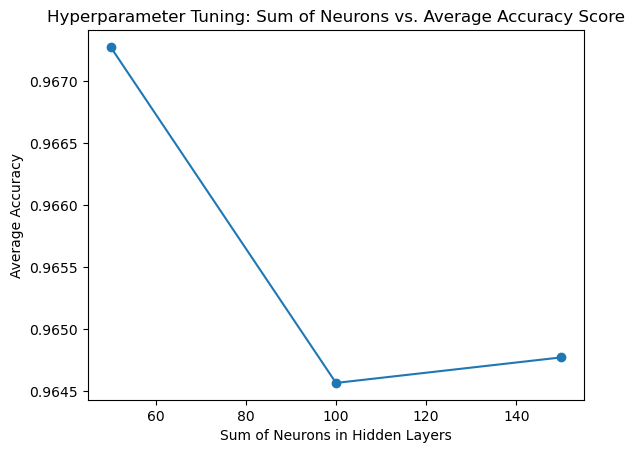

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Load the new dataset with clusters
bc_data_with_clusters = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_with_GMM_Clusters.csv')

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data_with_clusters.drop('diagnosis', axis=1))

# Splitting the dataset into training and testing sets
y = bc_data_with_clusters['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define a range of hyperparameters for the grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Initialize the MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Plotting the hyperparameter tuning results
# We'll use the sum of the sizes for simplicity (e.g., (50, 50) will be represented as 100)
size_representation = [sum(size) if isinstance(size, tuple) else size for size in param_grid['hidden_layer_sizes']]

# Create a mapping from size representation to mean scores
size_to_score = {sum(size): [] for size in param_grid['hidden_layer_sizes']}

# Populate the dictionary with mean test scores
for i, params in enumerate(grid_search.cv_results_['params']):
    size_sum = sum(params['hidden_layer_sizes']) if isinstance(params['hidden_layer_sizes'], tuple) else params['hidden_layer_sizes']
    size_to_score[size_sum].append(grid_search.cv_results_['mean_test_score'][i])

# Calculate the average score for each size sum
for size_sum in size_to_score:
    size_to_score[size_sum] = np.mean(size_to_score[size_sum])

# Sort the size representations for plotting
sorted_size_representation = sorted(size_to_score.keys())
sorted_scores = [size_to_score[size] for size in sorted_size_representation]

# Plotting the results
plt.plot(sorted_size_representation, sorted_scores, 'o-')
plt.xlabel('Sum of Neurons in Hidden Layers')
plt.ylabel('Average Accuracy')
plt.title('Hyperparameter Tuning: Sum of Neurons vs. Average Accuracy Score')
plt.show()


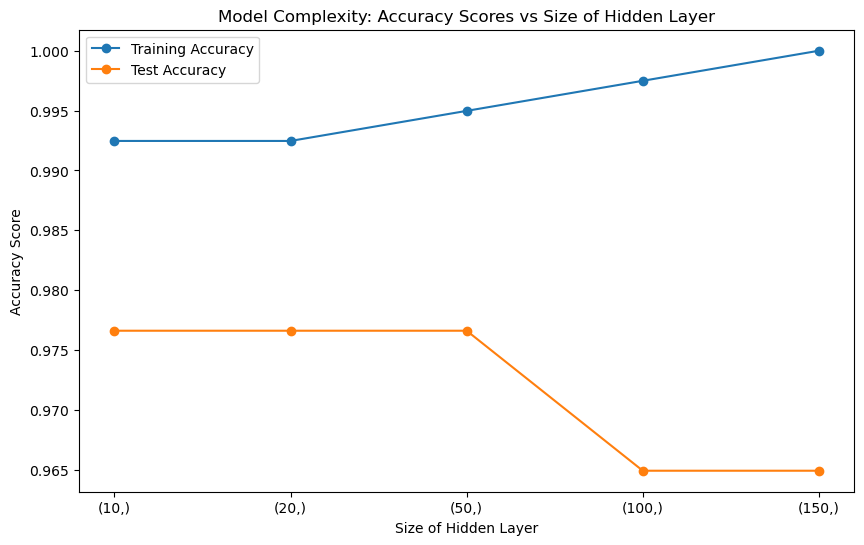

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed
# Also assuming that y_train and y_test are correctly formatted for sklearn (no need to call ravel())

# Test different sizes of the hidden layer
hidden_layer_sizes = [(10,), (20,), (50,), (100,), (150,)]
train_scores = []
test_scores = []

for size in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=size, max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    
    train_preds = mlp.predict(X_train)
    test_preds = mlp.predict(X_test)
    
    train_scores.append(accuracy_score(y_train, train_preds))
    test_scores.append(accuracy_score(y_test, test_preds))

# Plotting the model complexity graph
plt.figure(figsize=(10, 6))
plt.plot([str(size) for size in hidden_layer_sizes], train_scores, 'o-', label='Training Accuracy')
plt.plot([str(size) for size in hidden_layer_sizes], test_scores, 'o-', label='Test Accuracy')
plt.xlabel('Size of Hidden Layer')
plt.ylabel('Accuracy Score')
plt.title('Model Complexity: Accuracy Scores vs Size of Hidden Layer')
plt.legend()
plt.show()


Iteration 100, Training Score: 0.9824046920821115, Validation Score: 0.9824561403508771
Iteration 200, Training Score: 0.9882697947214076, Validation Score: 0.9912280701754386
Iteration 300, Training Score: 0.9912023460410557, Validation Score: 0.9824561403508771


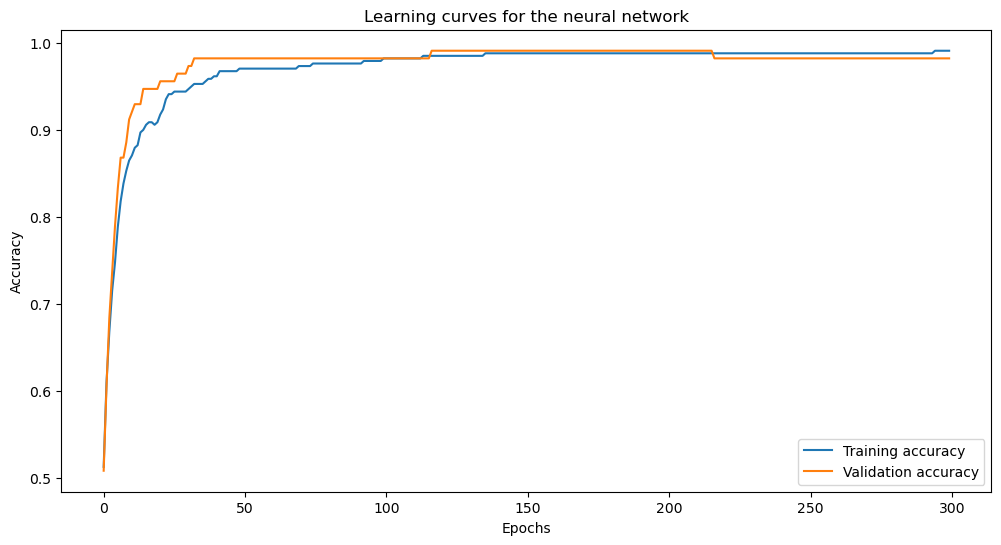

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

bc_data_with_clusters = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_with_GMM_Clusters.csv')

X = bc_data_with_clusters.drop('diagnosis', axis=1)
y = bc_data_with_clusters['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (60%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the optimal hyperparameters
optimal_hyperparams = {
    'hidden_layer_sizes': (50,),
    'activation': 'tanh',
    'learning_rate_init': 0.001
}

# Initialize the MLPClassifier with the optimal hyperparameters
mlp = MLPClassifier(max_iter=300, random_state=42, **optimal_hyperparams)

# List to store the scores
train_scores, val_scores = [], []

# Fit the model and collect the scores for each iteration
for i in range(1, 301):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y))
    train_scores.append(mlp.score(X_train, y_train))
    val_scores.append(mlp.score(X_val, y_val))
    
    # Print out the scores every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Training Score: {train_scores[-1]}, Validation Score: {val_scores[-1]}")

# Plotting the learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_scores, label='Training accuracy')
plt.plot(val_scores, label='Validation accuracy')
plt.title('Learning curves for the neural network')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [22]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load your dataset here
bc_data_with_clusters = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast_Cancer_with_GMM_Clusters.csv')
X = bc_data.drop('diagnosis', axis=1)
y = bc_data['diagnosis'].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists for collecting data
training_sizes_line = []
training_times_line = []
testing_times_line = []

# Variables for collecting metrics at full training size
training_time_bar = None
testing_time_bar = None
accuracy_bar = None
precision_bar = None
recall_bar = None
f1_score_bar = None

# Define the best parameters from GridSearchCV or other hyperparameter tuning
best_params = {
    'hidden_layer_sizes': (50,),
    'activation': 'tanh',
    'solver': 'adam',
    'learning_rate_init': 0.001
}

# Loop over training sizes from 10% to 90% in increments of 10%
for size in np.linspace(0.1, 0.9, 9):
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(
        X_scaled, y, train_size=size, random_state=42
    )
    mlp = MLPClassifier(**best_params, random_state=42, max_iter=1000)
    
    # Training time
    start_time = time.perf_counter()
    mlp.fit(X_train_part, y_train_part)
    training_time = time.perf_counter() - start_time
    
    # Testing time (average over several runs for precision)
    start_time = time.perf_counter()
    for _ in range(10):  # Adjust as needed for precision
        y_pred = mlp.predict(X_test_part)
    testing_time = (time.perf_counter() - start_time) / 10
    
    training_sizes_line.append(size * 100)
    training_times_line.append(training_time)
    testing_times_line.append(testing_time)

# Full training size
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, train_size=None, random_state=42
)
mlp_full = MLPClassifier(**best_params, random_state=42, max_iter=1000)

# Training time
start_time = time.perf_counter()
mlp_full.fit(X_train, y_train)
training_time_bar = time.perf_counter() - start_time

# Testing time (average over several runs for precision)
start_time = time.perf_counter()
for _ in range(100):  # Adjust as needed for precision
    y_pred_full = mlp_full.predict(X_test)
testing_time_bar = (time.perf_counter() - start_time) / 100

# Calculate metrics
accuracy_bar = accuracy_score(y_test, y_pred_full)
precision_bar = precision_score(y_test, y_pred_full)
recall_bar = recall_score(y_test, y_pred_full)
f1_score_bar = f1_score(y_test, y_pred_full)

# Print metrics
print(f"Training Time (Full): {training_time_bar:.2f} seconds")
print(f"Testing Time (Full): {testing_time_bar:.2f} seconds")
print(f"Accuracy (Full): {accuracy_bar:.2f}")
print(f"Precision (Full): {precision_bar:.2f}")
print(f"Recall (Full): {recall_bar:.2f}")
print(f"F1 Score (Full): {f1_score_bar:.2f}")

# Create DataFrames
line_plot_df = pd.DataFrame({
    'Training Size (%)': training_sizes_line,
    'Training Time (s)': training_times_line,
    'Testing Time (s)': testing_times_line
})

bar_chart_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_bar, precision_bar, recall_bar, f1_score_bar]
})

# Export to Excel
with pd.ExcelWriter('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\mlp_performance_analysis-GMM.xlsx') as writer:
    line_plot_df.to_excel(writer, sheet_name='Line Plots Data', index=False)
    bar_chart_df.to_excel(writer, sheet_name='Bar Chart Data', index=False)


Training Time (Full): 0.38 seconds
Testing Time (Full): 0.00 seconds
Accuracy (Full): 0.98
Precision (Full): 0.96
Recall (Full): 0.98
F1 Score (Full): 0.97
